In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X = pd.read_csv("X.csv", index_col=0)
y = pd.read_csv("y.csv", index_col=0)

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
# standardize the data.
ss_X = StandardScaler()
X_ss = ss_X.fit_transform(X)
ss_y = StandardScaler()
y_ss = ss_y.fit_transform(np.array(y).reshape(-1, 1))

In [5]:
X_ss = pd.DataFrame(X_ss, columns=["alpha1", "alpha2", "alpha3", "alpha4", "alpha5", "alpha6", "alpha7"])
y_ss = pd.DataFrame(y_ss, columns=["return"])

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [7]:
X_ss = sm.add_constant(X_ss)

In [8]:
regression1 = sm.OLS(y_ss, X_ss)
model1 = regression1.fit()
print(model1.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &      return      & \textbf{  R-squared:         } &     0.059   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.054   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     14.49   \\
\textbf{Date:}             & Thu, 13 Apr 2023 & \textbf{  Prob (F-statistic):} &  2.13e-18   \\
\textbf{Time:}             &     21:07:18     & \textbf{  Log-Likelihood:    } &   -2277.6   \\
\textbf{No. Observations:} &        1640      & \textbf{  AIC:               } &     4571.   \\
\textbf{Df Residuals:}     &        1632      & \textbf{  BIC:               } &     4614.   \\
\textbf{Df Model:}         &           7      & \textbf{                     } &             \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                & \textbf{coef} & \text

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_ss, y_ss, random_state=10)

In [10]:
reg_1 = LinearRegression()
cross_val_score(reg_1,X_train,y_train,cv=10,scoring="r2").mean()

0.020967364748314087

In [11]:
reg_2 = Ridge()
cross_val_score(reg_2,X_train,y_train,cv=10,scoring="r2").mean()

0.021045370329735823

In [12]:
# consider the correlation of alpha1, alpha3, alpha4, I take one of them and train model one by one.
X_2 = X_train.iloc[:, [0, 1, 2, 5, 6, 7]] 
X_3 = X_train.iloc[:, [0, 2, 3, 5, 6, 7]]
X_4 = X_train.iloc[:, [0, 2, 4, 5, 6, 7]]
print("linear reg of 1, 2, 5, 6, 7: {}".format(cross_val_score(reg_1,X_2,y_train,cv=10,scoring="r2").mean()))
print("ridge reg of 1, 2, 5, 6, 7: {}".format(cross_val_score(reg_2,X_2,y_train,cv=10,scoring="r2").mean()))
print("linear reg of 2, 3, 5, 6, 7: {}".format(cross_val_score(reg_1,X_3,y_train,cv=10,scoring="r2").mean()))
print("ridge reg of 2, 3, 5, 6, 7: {}".format(cross_val_score(reg_2,X_3,y_train,cv=10,scoring="r2").mean()))
print("linear reg of 2, 4, 5, 6, 7: {}".format(cross_val_score(reg_1,X_4,y_train,cv=10,scoring="r2").mean()))
print("ridge reg of 2, 4, 5, 6, 7: {}".format(cross_val_score(reg_2,X_4,y_train,cv=10,scoring="r2").mean()))

linear reg of 1, 2, 5, 6, 7: 0.02301672427984224
ridge reg of 1, 2, 5, 6, 7: 0.023077314838793307
linear reg of 2, 3, 5, 6, 7: 0.01987591299283118
ridge reg of 2, 3, 5, 6, 7: 0.019936738807049537
linear reg of 2, 4, 5, 6, 7: 0.01834074905605738
ridge reg of 2, 4, 5, 6, 7: 0.01840065375168278


In [20]:
reg_2.fit(X_test.iloc[:, [0, 1, 2, 5, 6, 7]],y_test)
y_pre = reg_2.predict(X_test.iloc[:, [0, 1, 2, 5, 6, 7]])
r2_score(y_test, y_pre)

0.0635398321255557

Text(0, 0.5, 'Price')

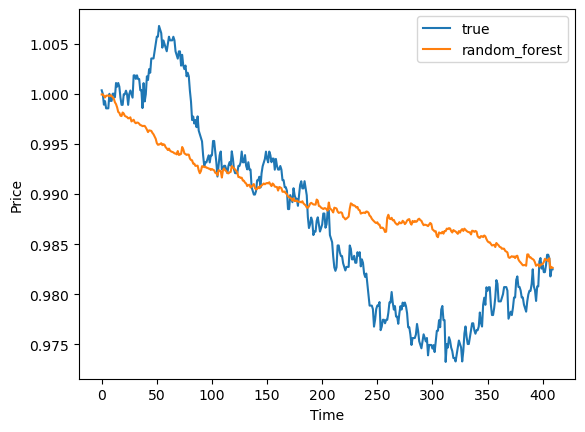

In [21]:
y_pre = ss_y.inverse_transform(reg_2.predict(X_test.iloc[:, [0, 1, 2, 5, 6, 7]]).reshape(-1, 1))
cash = [[1], [1]]
for i in range(len(y_test)):
    cash[0].append(cash[0][-1]*(1 + ss_y.inverse_transform(np.array(y_test).reshape(-1, 1))[i]))
    cash[1].append(cash[1][-1]*(1 + y_pre[i]))
plt.plot(range(len(y_test)), cash[0][1:], label = "true")
plt.plot(range(len(y_test)), cash[1][1:], label = "random_forest")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Price")

In [15]:
import joblib

In [16]:
joblib.dump(reg_2, 'saved_model/reg_ridge.pkl')

['saved_model/reg_ridge.pkl']

In [22]:
joblib.dump(ss_X, 'saved_model/ss_X.pkl')
joblib.dump(ss_y, 'saved_model/ss_y.pkl')

['saved_model/ss_y.pkl']